ДЗ
========
Взять с прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель

In [4]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

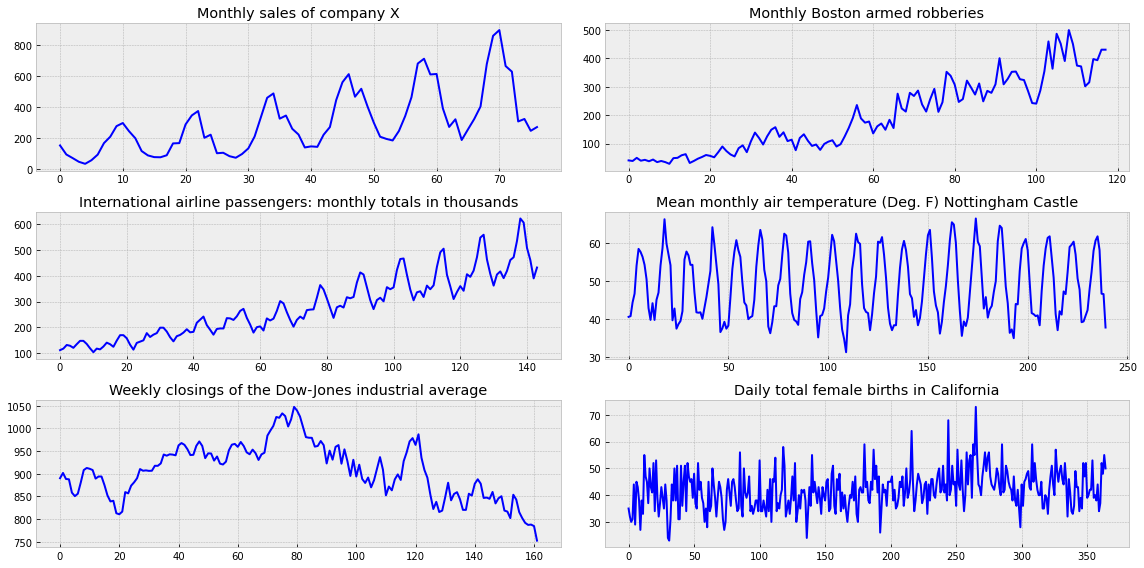

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Для ДЗ выбираем один график
=====

Выбираем один временной ряд

In [71]:
series_nonstat = {
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"]
}

In [72]:
series_name = list(series_nonstat)[0]

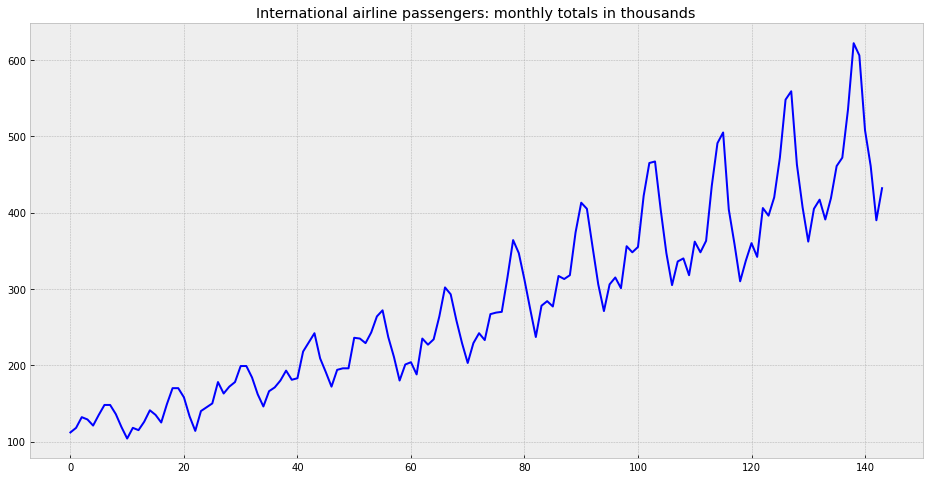

In [101]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(series_nonstat[series_name],color='blue')
    plt.title(series_name)

# Ищем сезонность

In [74]:
def plot_ts_and_points(ts, title, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        ts_ax.set_title(title)
        new_series.plot(ax=ts_ax, style='ro')

Построим график сезонности для каждого элемента

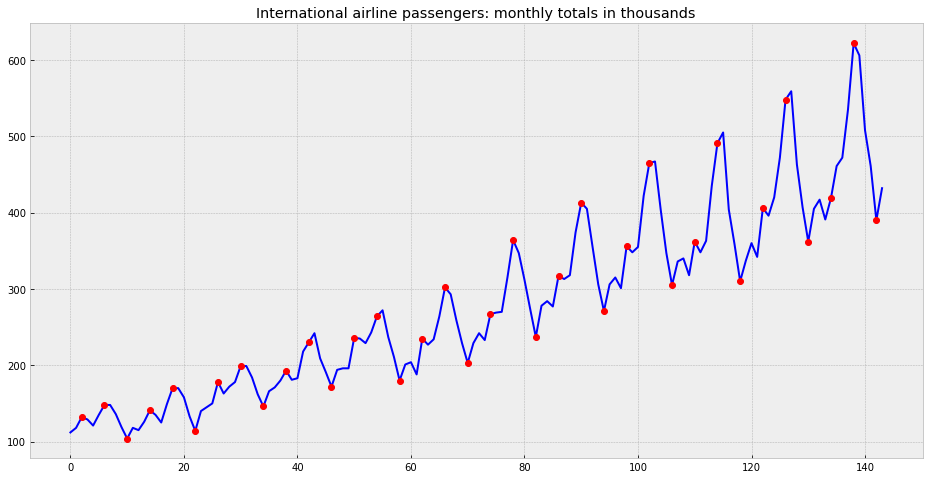

In [75]:
plot_ts_and_points(series_nonstat[series_name], series_name, 2, 4)

# Нормализуем дисперсию

In [76]:
from scipy.stats import boxcox

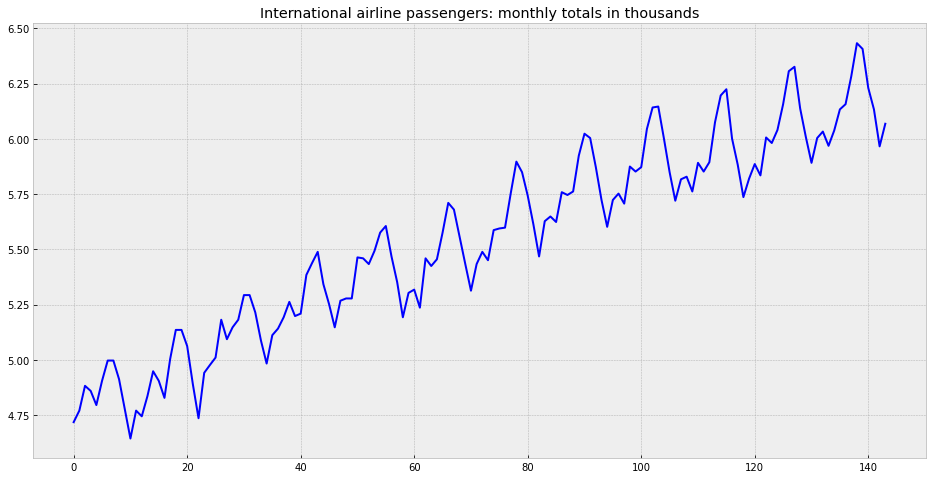

In [79]:
series_boxcox = boxcox(series_nonstat[series_name], 0)
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(series_boxcox ,color='blue')
    plt.title(series_name)

# Тест Дики-Фуллера 

In [80]:
from statsmodels.tsa.stattools import adfuller

In [81]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    #print(dfoutput)
    print(dfoutput['p-value']) 

In [82]:
test_stationarity(series_boxcox)

Results of Dickey-Fuller Test:
0.42236677477038864


Согласно тесту Дики-Фуллера: ряд нестационарен

# Коррелограммы

In [83]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [84]:
def tsplot(y, title, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

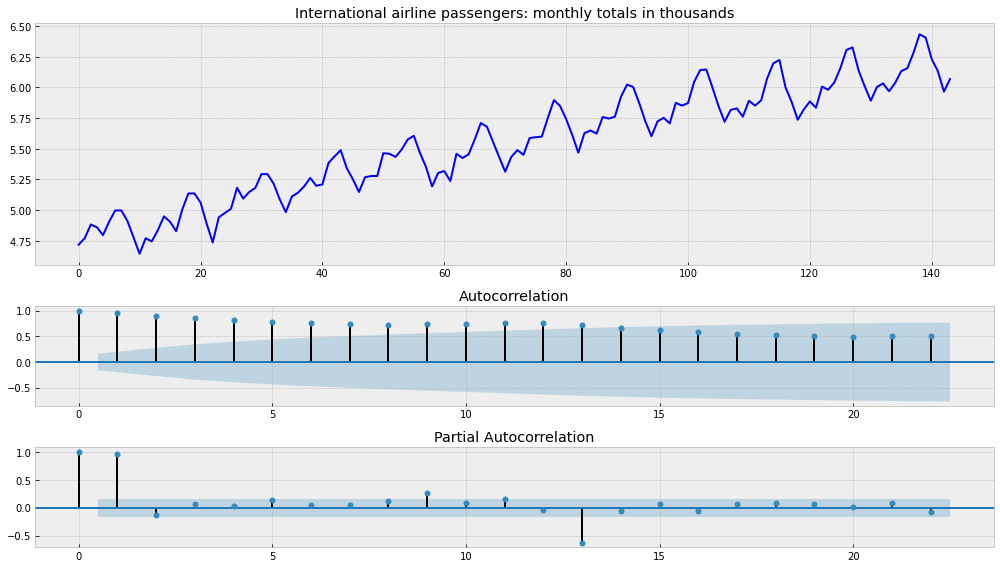

In [85]:
tsplot(series_boxcox, series_name)

# Дифференцируем 

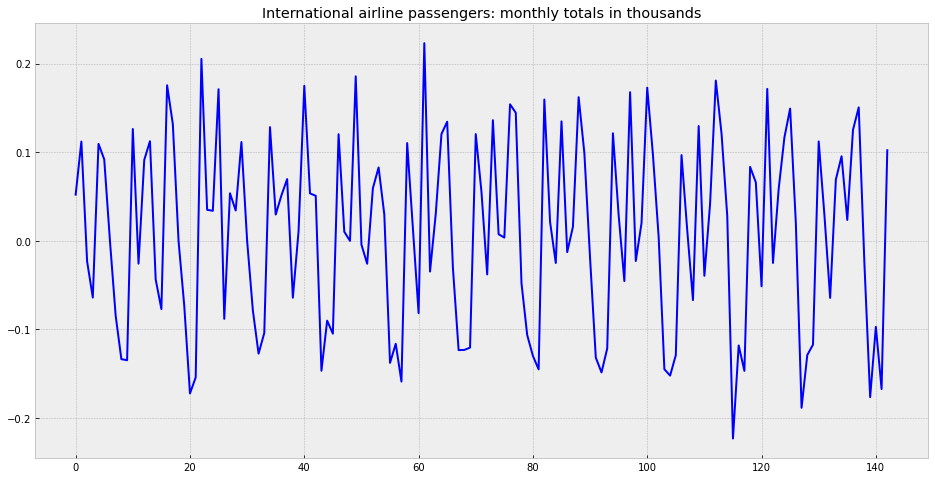

In [88]:
series_diff = np.diff(series_boxcox, 1)

with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(series_diff ,color='blue')
    plt.title(series_name)

Еще раз тест Дики-Фуллера
======

In [90]:
test_stationarity(series_diff)

Results of Dickey-Fuller Test:
0.07112054815085732


p-value больше альфа значения, уберем сезонность

In [91]:
series_diff = series_diff[1:] - series_diff[:-1]

In [92]:
test_stationarity(series_diff)

Results of Dickey-Fuller Test:
7.419304549375512e-13


In [94]:
series_stat = series_diff.copy()

Теперь имеем один стационарный ряд и один нет.

Переходим к ДЗ
=======

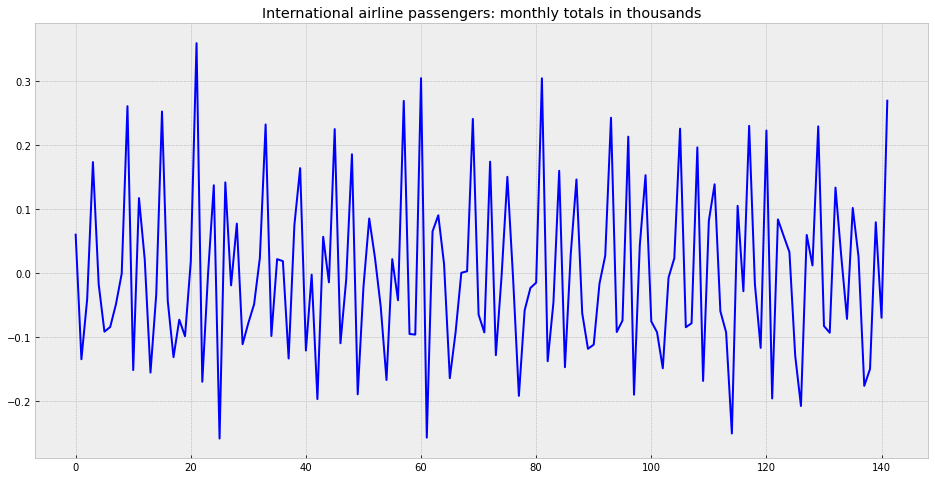

In [95]:
# Стационарный ряд
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(series_stat ,color='blue')
    plt.title(series_name)

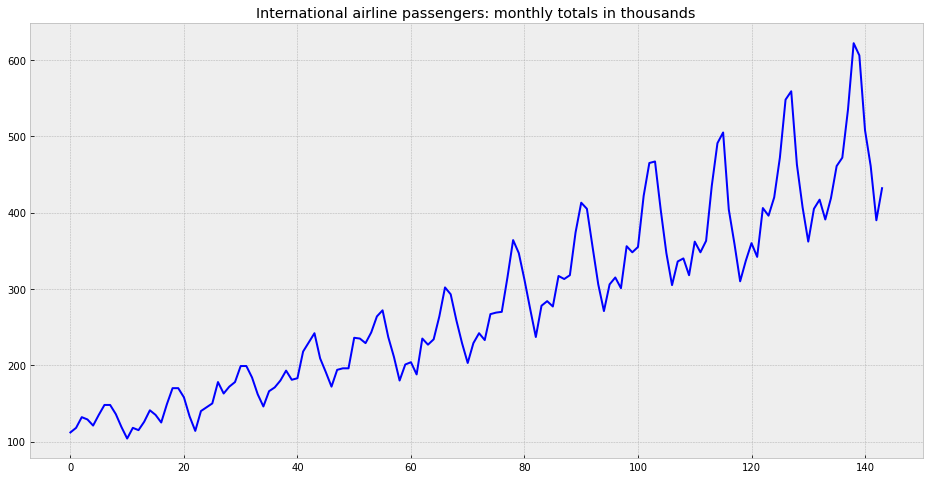

In [103]:
series_nonstat = series_nonstat[series_name]
# Нестационарный ряд
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    plt.plot(series_nonstat ,color='blue')
    plt.title(series_name)

Скользящее среднее
=========

In [96]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

Нестационарный временной ряд
-----

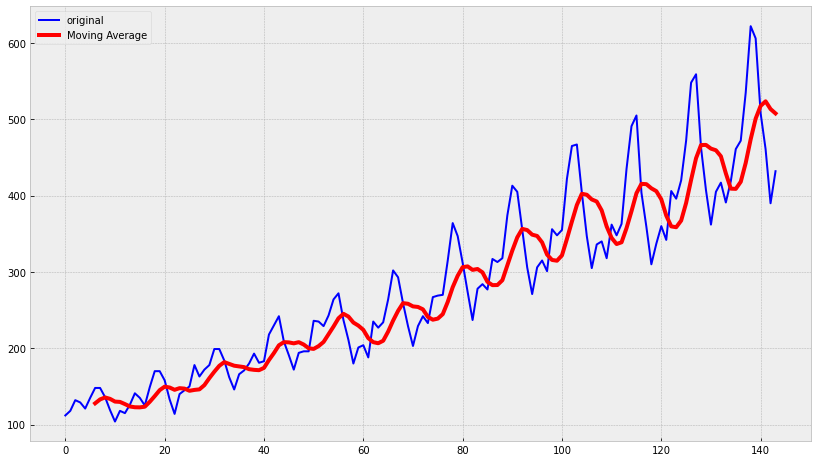

In [104]:
ser = moving_average(series_nonstat, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_nonstat, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

Стационарный временной ряд
-----

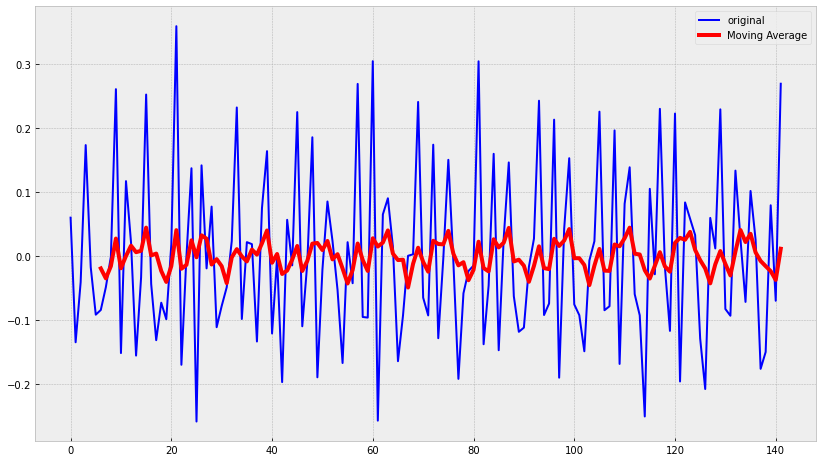

In [108]:
ser = moving_average(series_stat, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_stat, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

Взвешенная скользящая средняя
====

In [109]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

Нестационарный временной ряд
-----

In [112]:
series = series_nonstat
wma_fib = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series, 7, [1,2,4,8,16,32,64])

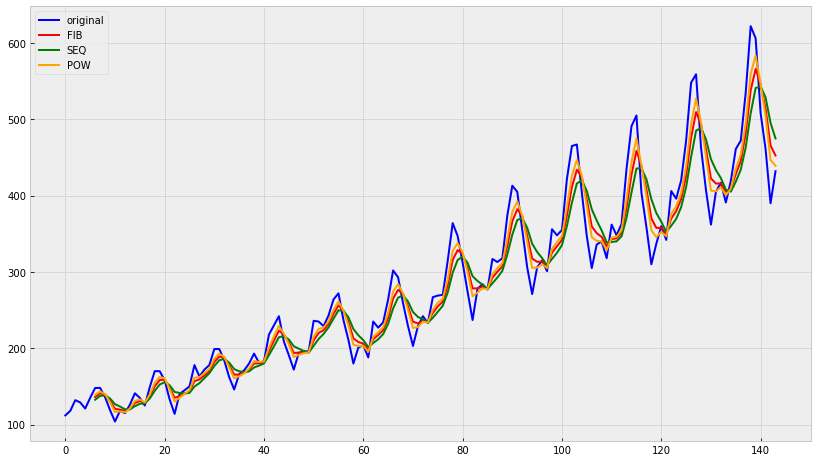

In [113]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

Стационарный временной ряд
-----

In [114]:
series = series_stat
wma_fib = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series, 7, [1,2,4,8,16,32,64])

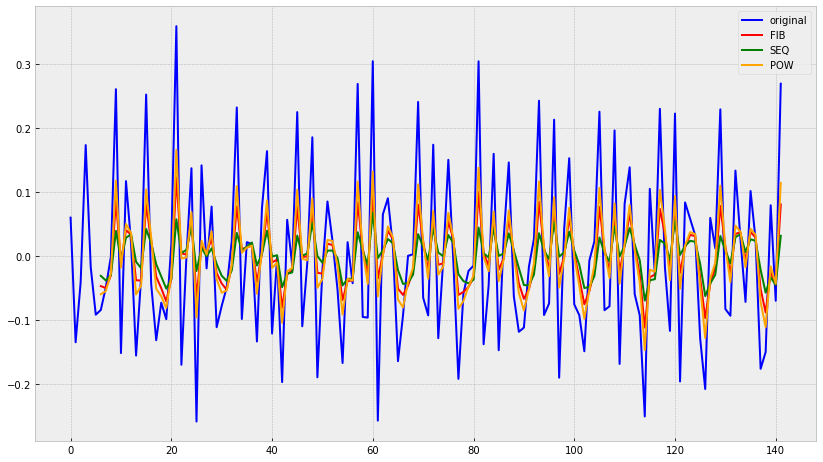

In [115]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

# Экспоненциальное сглаживание

In [119]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

Нестационарный временной ряд
-----

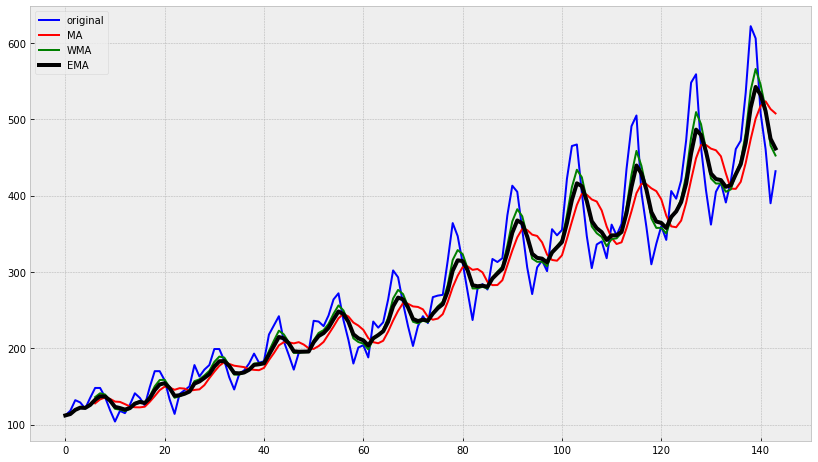

In [121]:
ema = exponential_moving_average(series_nonstat, 0.3)
wma = weighted_moving_average(series_nonstat, 7, [1,1,2,3,5,8,13])
ma = moving_average(series_nonstat, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_nonstat, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

Стационарный временной ряд
-----

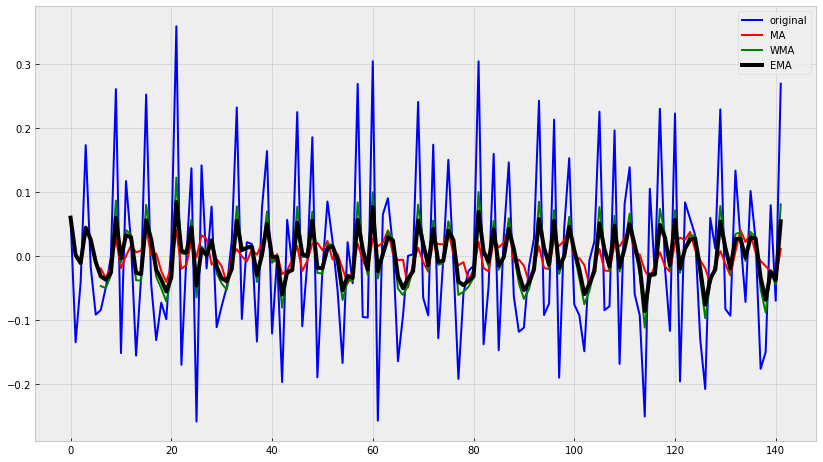

In [122]:
ema = exponential_moving_average(series_stat, 0.3)
wma = weighted_moving_average(series_stat, 7, [1,1,2,3,5,8,13])
ma = moving_average(series_stat, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_stat, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

# Двойное экспоненциальное сглаживание

In [125]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [126]:
def plot_dema(alpha, beta, series):
    dema = double_ema(series, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

Нестационарный временной ряд
-----

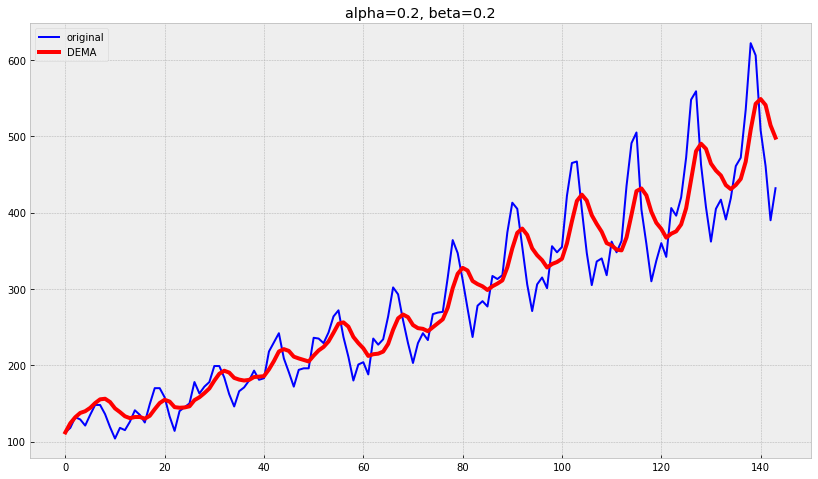

In [127]:
plot_dema(0.2, 0.2, series_nonstat)

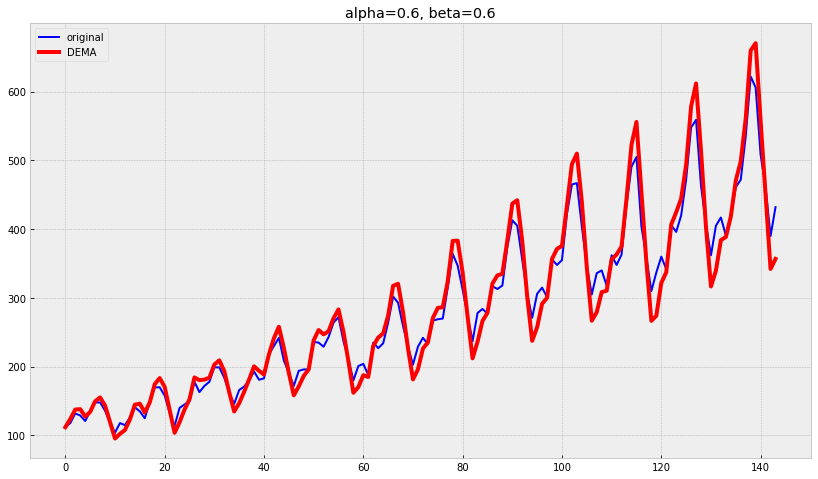

In [140]:
plot_dema(0.6, 0.6, series_nonstat)

Стационарный временной ряд
-----

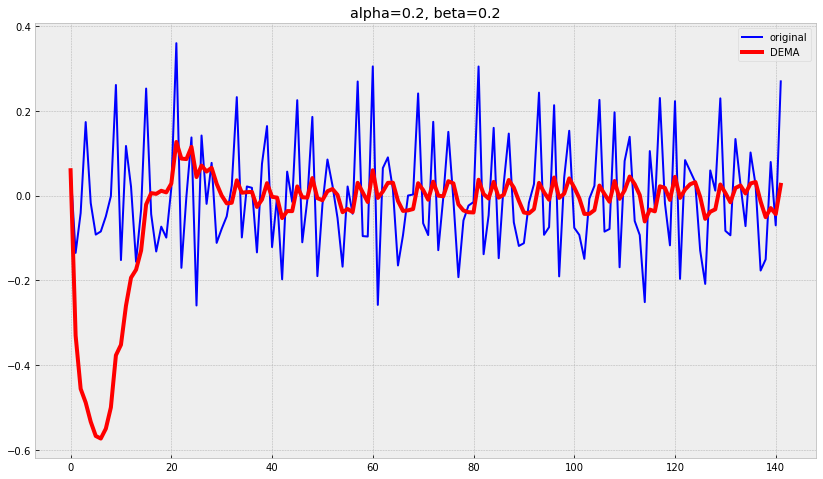

In [130]:
plot_dema(0.2, 0.2, series_stat)

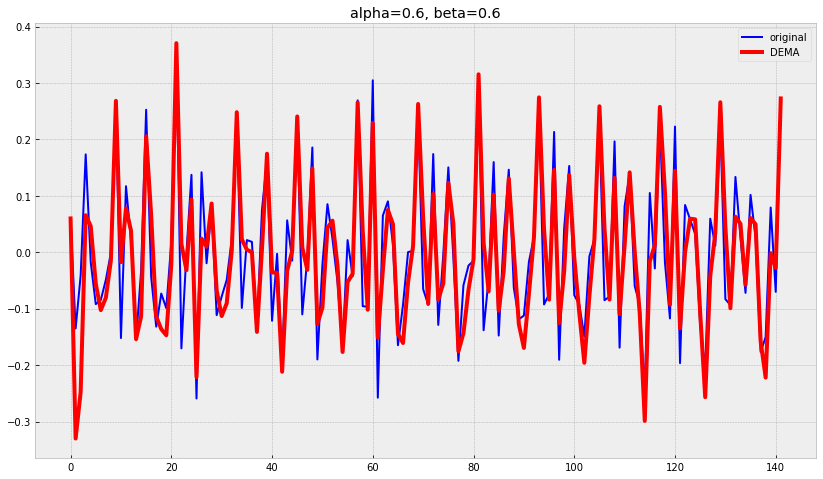

In [137]:
plot_dema(0.6, 0.6, series_stat)

Прогнозируем с помощью двойного экспоненциального сглаживания
=======

In [144]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)

Нестационарный временной ряд
-----

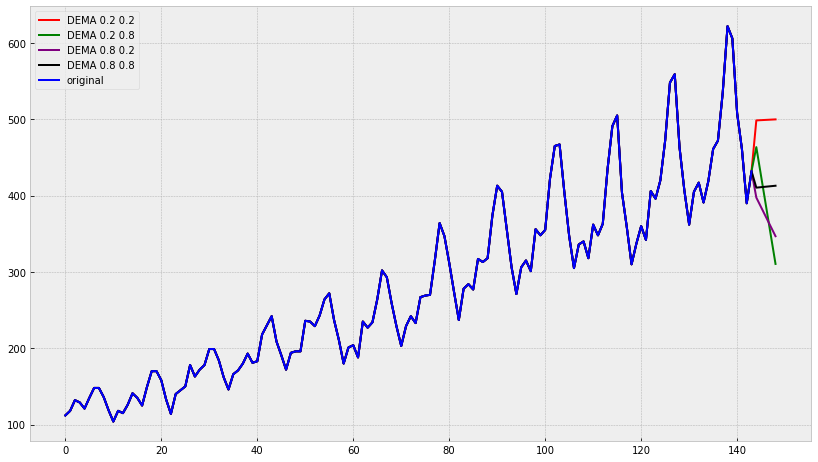

In [145]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(series_nonstat, alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(series_nonstat, color='blue',label='original')
    plt.legend()

Стационарный временной ряд
-----

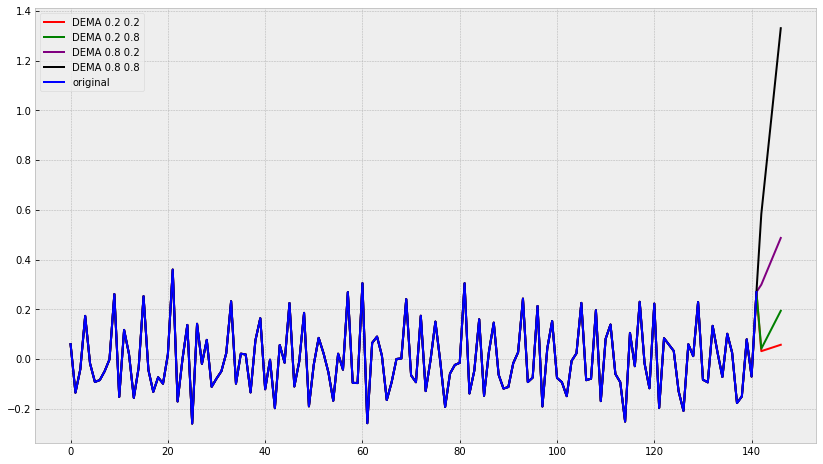

In [151]:
series_stat = pd.Series(series_stat)
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(series_stat, alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(series_stat, color='blue',label='original')
    plt.legend()

# Хольт-Винтерс

In [155]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [156]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [157]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

Нестационарный временной ряд
-----

In [159]:
def plot_tema(alpha, beta, gamma, ser=series_nonstat, ser_to_plot=series_nonstat, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

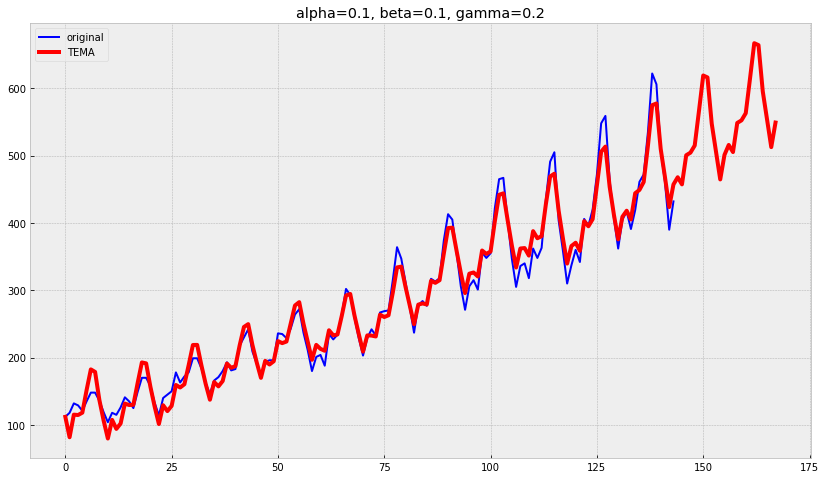

In [160]:
plot_tema(0.1, 0.1, 0.2)

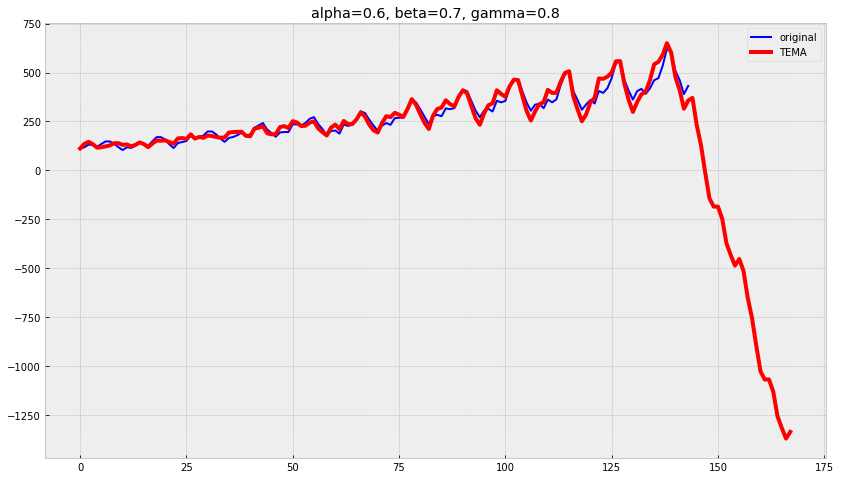

In [161]:
plot_tema(0.6, 0.7, 0.8)

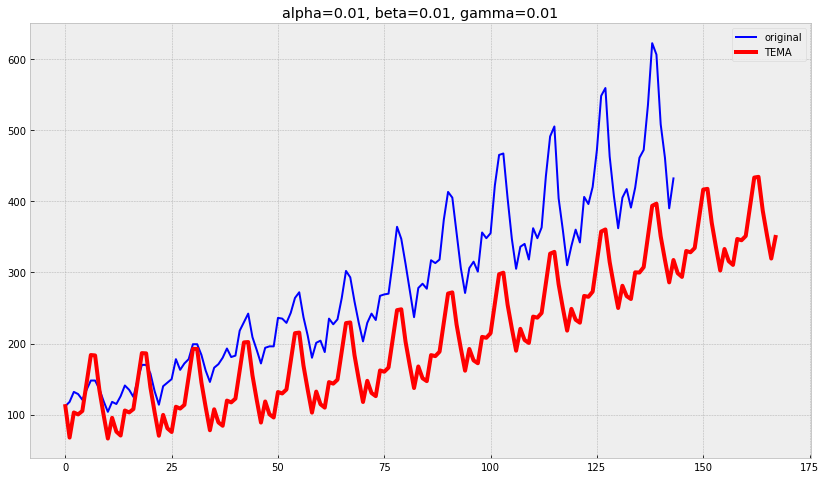

In [162]:
plot_tema(0.01, 0.01, 0.01)

Стационарный временной ряд
-----

In [163]:
def plot_tema(alpha, beta, gamma, ser=series_stat, ser_to_plot=series_stat, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

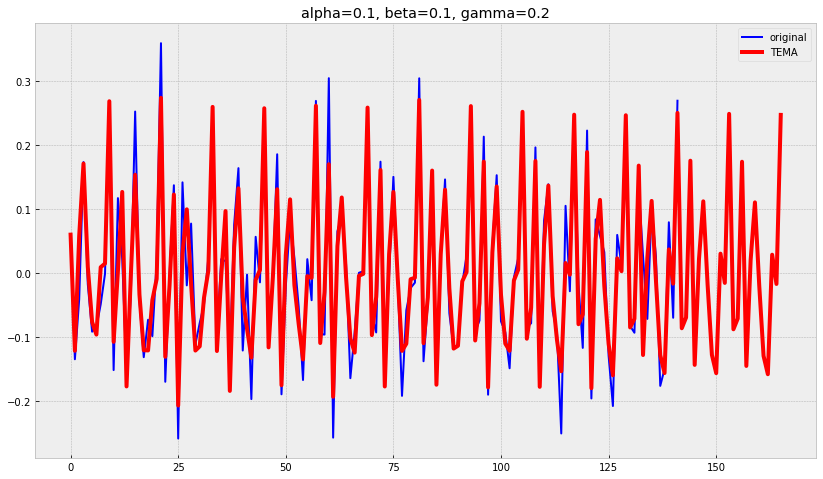

In [164]:
plot_tema(0.1, 0.1, 0.2)

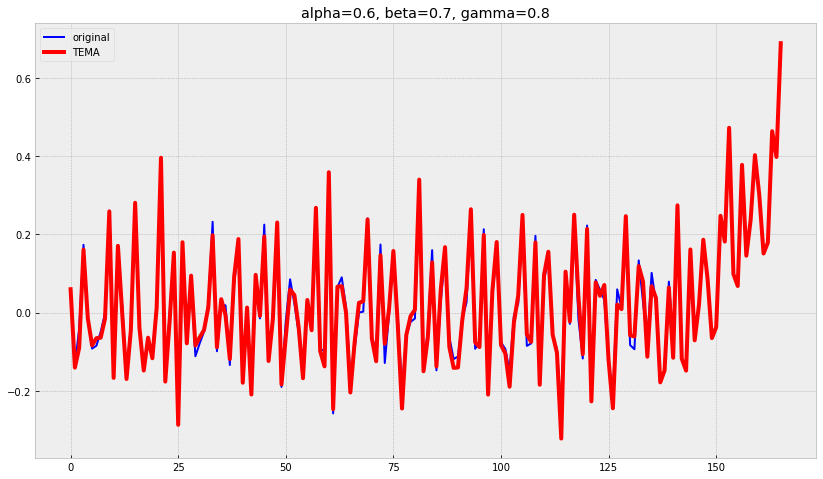

In [165]:
plot_tema(0.6, 0.7, 0.8)

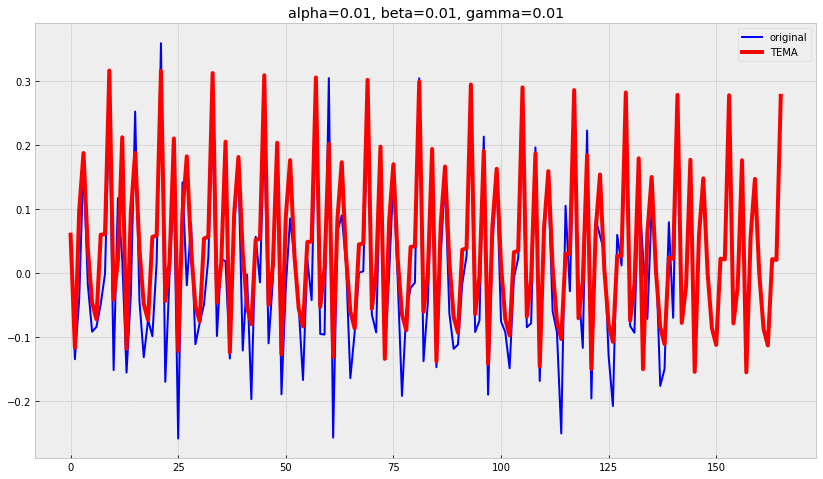

In [166]:
plot_tema(0.01, 0.01, 0.01)

# Подбор параметров

In [175]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

Нестационарный временной ряд
-----

In [190]:
series = series_nonstat

In [191]:
train, test, val = series[:120], series[120:132], series[132:]

In [192]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [193]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1))) # в mse передаем три числв в спике

In [194]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 81.96554450662094
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.10763728, -0.00469953, -0.04625491])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 384
      nit: 60
     njev: 96
   status: 0
  success: True
        x: array([0.23441206, 0.51328097, 0.53442435])


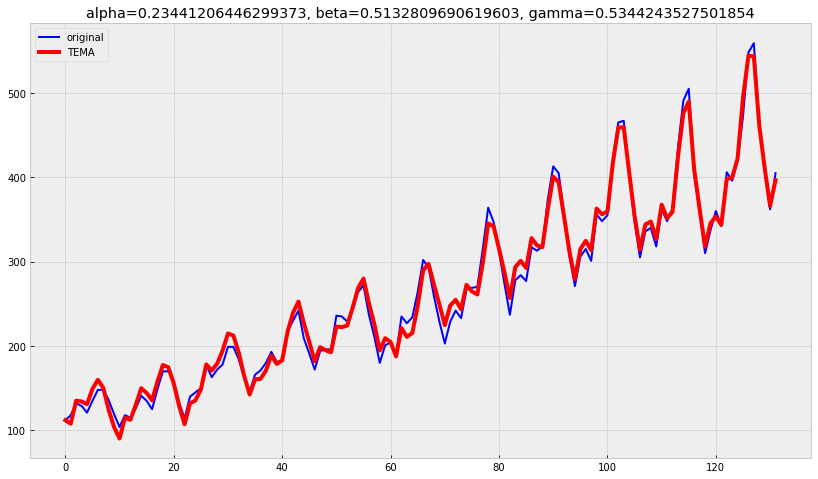

In [195]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:132], n_preds=len(test))

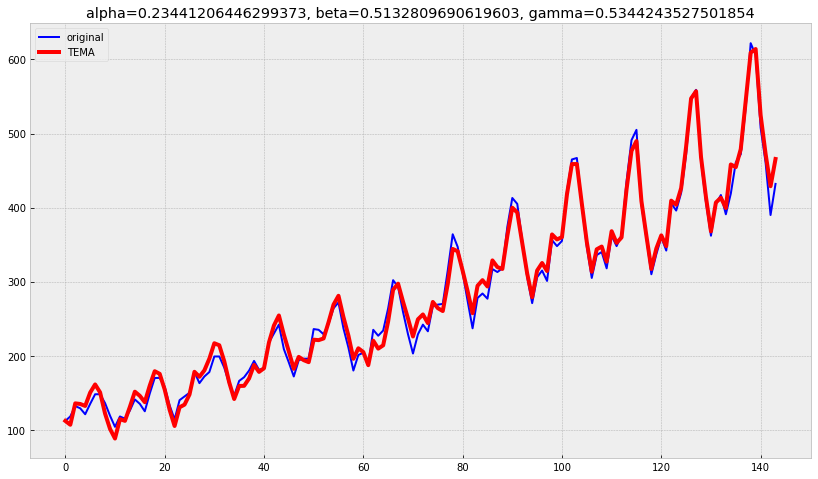

In [196]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series[:132], ser_to_plot=series, n_preds=len(val))

Стационарный временной ряд
-----

In [197]:
series = series_stat

In [198]:
train, test, val = series[:120], series[120:132], series[132:]

In [199]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [200]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1))) # в mse передаем три числв в спике

In [201]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 0.0015904701202511678
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.07785481e-06, -7.94182428e-06,  7.22718323e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 112
      nit: 23
     njev: 28
   status: 0
  success: True
        x: array([0.19431443, 0.02491099, 0.50096566])


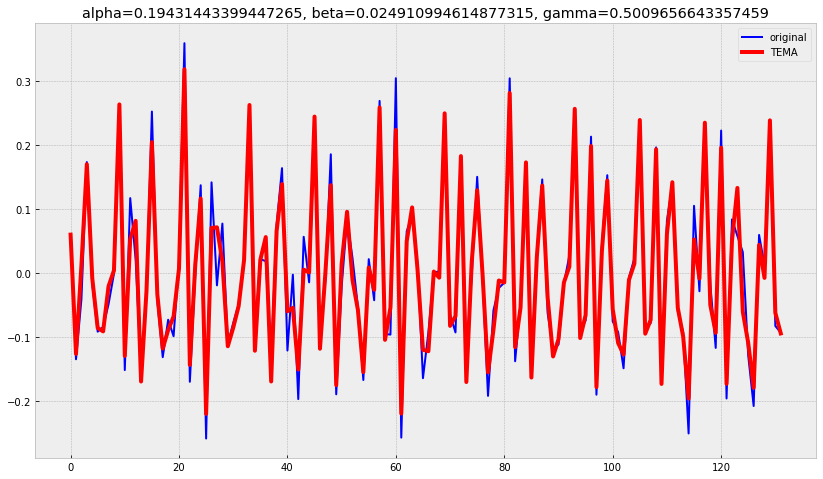

In [202]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:132], n_preds=len(test))

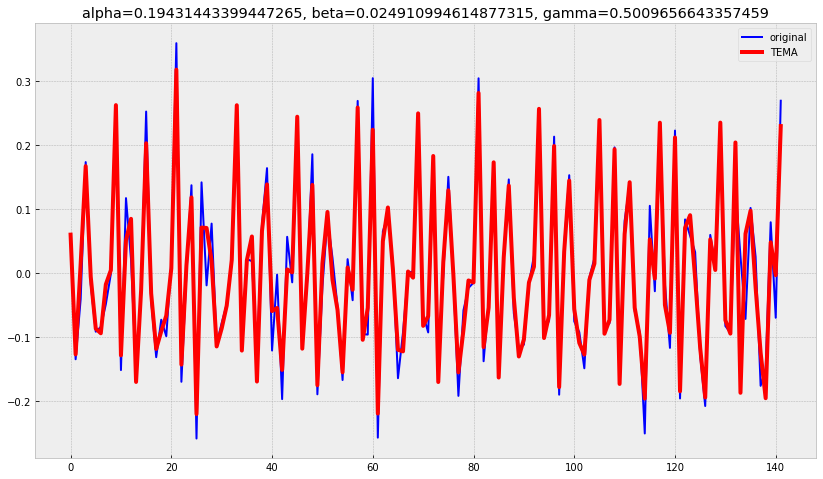

In [203]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series[:132], ser_to_plot=series, n_preds=len(val))

# Кросс валидация

Нестационарный временной ряд
-----

In [216]:
train, val = series_nonstat[:125], series_nonstat[125:]

In [217]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        result = triple_exponential_smoothing(train_split, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split):]
        error = mean_squared_error(predictions, test_split)
        errors.append(error)

    return np.mean(np.array(errors))

In [218]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [219]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 5.218227279717532e-06
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.41720978e-04,  7.32858085e-05, -8.24883751e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 436
      nit: 88
     njev: 109
   status: 0
  success: True
        x: array([0.0355648 , 0.28857834, 0.98753526])


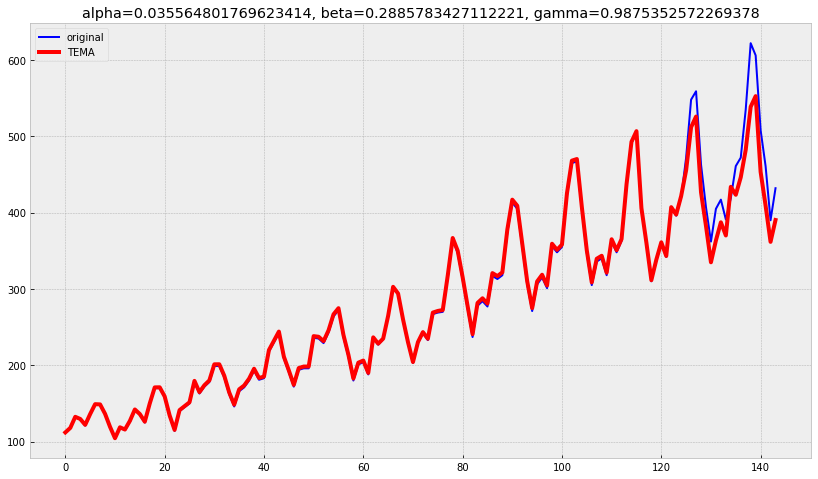

In [220]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series_nonstat, n_preds=len(val))

Стационарный временной ряд
-----

In [221]:
train, val = series_stat[:125], series_stat[125:]

In [222]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        result = triple_exponential_smoothing(train_split, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split):]
        error = mean_squared_error(predictions, test_split)
        errors.append(error)

    return np.mean(np.array(errors))

In [223]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [224]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 5.218227279717532e-06
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.41720978e-04,  7.32858085e-05, -8.24883751e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 436
      nit: 88
     njev: 109
   status: 0
  success: True
        x: array([0.0355648 , 0.28857834, 0.98753526])


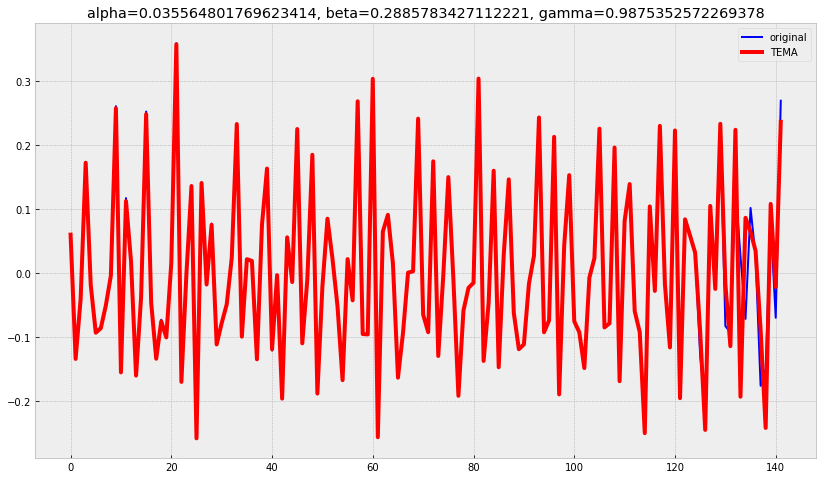

In [225]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series_stat, n_preds=len(val))